<a href="https://colab.research.google.com/github/Adithya280399/Adithya_INFO5731_Fall2025/blob/main/ClassExercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
%load_ext rpy2.ipython


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving distress_clean.csv to distress_clean.csv


In [ ]:
%%R
library(readr)
library(dplyr)
library(tidyr)
library(stringr)

# Read dataset
df <- read_csv("distress_clean.csv", show_col_types = FALSE)

# Clean numeric columns: remove % and $ and convert to numeric
df <- df %>%
  mutate(
    `Unemployment Rate (24-Month Avg)` = as.numeric(str_replace_all(`Unemployment Rate (24-Month Avg)`, "%", "")),
    `Unemployment Difference` = as.numeric(`Unemployment Difference`),
    `Per Capita Personal Income (BEA PCPI)` = as.numeric(str_replace_all(`Per Capita Personal Income (BEA PCPI)`, "[$,]", "")),
    `PCPI Index (US=100)` = as.numeric(`PCPI Index (US=100)`),
    `Per Capita Money Income (ACS 5-Year PCMI)` = as.numeric(str_replace_all(`Per Capita Money Income (ACS 5-Year PCMI)`, "[$,]", "")),
    `PCMI Index (US=100)` = as.numeric(`PCMI Index (US=100)`)
  )

# Now pivot to long format
df_long <- df %>%
  pivot_longer(
    cols = -Geography,
    names_to = "Metric",
    values_to = "Value"
  )

# Preview
head(df_long)



# A tibble: 6 × 3
  Geography         Metric                                       Value
  <chr>             <chr>                                        <dbl>
1 Dallas County, TX Unemployment Rate (24-Month Avg)              4.01
2 Dallas County, TX Unemployment Difference                      -0.01
3 Dallas County, TX Per Capita Personal Income (BEA PCPI)     79626   
4 Dallas County, TX PCPI Index (US=100)                         114.  
5 Dallas County, TX Per Capita Money Income (ACS 5-Year PCMI) 41272   
6 Dallas County, TX PCMI Index (US=100)                          95.3 



Attaching package: ‘scales’

The following object is masked from ‘package:readr’:

    col_factor



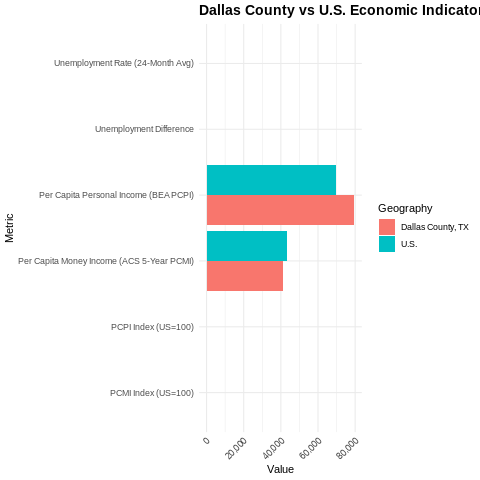

In [ ]:
%%R
library(ggplot2)
library(scales)

# Example plot: Compare Dallas vs U.S. across all metrics
ggplot(df_long, aes(x = Metric, y = Value, fill = Geography)) +
  geom_col(position = "dodge") +
  coord_flip() +  # flip for readability
  labs(
    title = "Dallas County vs U.S. Economic Indicators",
    x = "Metric",
    y = "Value"
  ) +
  scale_y_continuous(labels = comma) +  # format large numbers
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(size = 14, face = "bold")
  )
